# Tutorial for `GeoCroissant` 🥐

## Introduction

<img src="GeoCroissant.jpg" alt="GeoCroissant" width="150" style="float: right; margin-left: 50px;">

Croissant 🥐 is a high-level format for machine learning datasets that combines metadata, resource file descriptions, data structure, and default ML semantics into a single file.

Croissant builds on schema.org, and its `sc:Dataset` vocabulary, a widely used format to represent datasets on the Web, and make them searchable.

GeoCroissant extends Croissant with geospatial concepts (e.g., spatial extents, coordinate reference systems, temporal coverage), enabling rich, location-aware metadata for Earth-observation and other spatial datasets.

The [`mlcroissant`](https://github.com/mlcommons/croissant) Python library empowers developers to interact with Croissant:

- Programmatically write your JSON-LD Croissant files.
- Verify your JSON-LD Croissant files.
- Load data from Croissant datasets.

In [1]:
# Install mlcroissant 
!pip install mlcroissant

# Example: Creating Croissant Metadata for the HLS Burn Scars Dataset

Let's try a concrete example with the [HLS Burn Scars dataset](https://huggingface.co/datasets/ibm-nasa-geospatial/hls_burn_scars) hosted on Hugging Face. 

In this tutorial, we'll **programmatically generate** the Croissant JSON-LD metadata for the dataset using the `mlcroissant` Python package. 

Finally, we’ll **validate and inspect the metadata structure**.


In [2]:
import mlcroissant as mlc
import json

distribution = [
    mlc.FileObject(
        id="repo",
        name="repo",
        description="The Hugging Face git repository.",
        content_url="https://huggingface.co/datasets/ibm-nasa-geospatial/hls_burn_scars/resolve/main/hls_burn_scars.tar.gz",
        encoding_formats=["git+https"],
        sha256="https://github.com/mlcommons/croissant/issues/80",
    ),
    mlc.FileSet(
        id="parquet-files-for-config-hls_burn_scars",
        name="parquet-files-for-config-hls_burn_scars",
        description="The underlying Parquet files as converted by Hugging Face (see: https://huggingface.co/docs/dataset-viewer/parquet).",
        contained_in=["repo"],
        encoding_formats=["application/x-parquet"],
        includes="hls_burn_scars/*/*.parquet",
    ),
]

record_sets = [
    mlc.RecordSet(
        id="hls_burn_scars_splits",
        name="hls_burn_scars_splits",
        description="Splits for the hls_burn_scars config.",
        fields=[
            mlc.Field(
                id="hls_burn_scars_splits/split_name",
                name="split_name",
                description="The name of the split.",
                data_types=[mlc.DataType.TEXT],
            )
        ],
        data=[
            {"hls_burn_scars_splits/split_name": "train"},
            {"hls_burn_scars_splits/split_name": "validation"},
            {"hls_burn_scars_splits/split_name": "test"},
        ],
    ),
    mlc.RecordSet(
        id="hls_burn_scars",
        name="hls_burn_scars",
        description=(
            "ibm-nasa-geospatial/hls_burn_scars - 'hls_burn_scars' subset\n\n"
            "Additional information:\n- 3 splits: train, validation, test"
        ),
        fields=[
            mlc.Field(
                id="hls_burn_scars/split",
                name="hls_burn_scars/split",
                description="Split to which the example belongs.",
                data_types=[mlc.DataType.TEXT],
                source=mlc.Source(
                    file_set="parquet-files-for-config-hls_burn_scars",
                    extract=mlc.Extract(column="split"),
                ),
            ),
            mlc.Field(
                id="hls_burn_scars/image",
                name="hls_burn_scars/image",
                description="Image column 'image' from the Hugging Face parquet file.",
                data_types=[mlc.DataType.IMAGE_OBJECT],
                source=mlc.Source(
                    file_set="parquet-files-for-config-hls_burn_scars",
                    extract=mlc.Extract(column="image"),
                ),
            ),
            mlc.Field(
                id="hls_burn_scars/annotation",
                name="hls_burn_scars/annotation",
                description="Image column 'annotation' from the Hugging Face parquet file.",
                data_types=[mlc.DataType.IMAGE_OBJECT],
                source=mlc.Source(
                    file_set="parquet-files-for-config-hls_burn_scars",
                    extract=mlc.Extract(column="annotation"),
                ),
            ),
        ],
    ),
]

metadata = mlc.Metadata(
    name="hls_burn_scars",
    description=(
        "This dataset contains Harmonized Landsat and Sentinel-2 imagery of burn scars and the associated masks "
        "for the years 2018-2021 over the contiguous United States. There are 804 512x512 scenes. Its primary purpose "
        "is for training geospatial machine learning models."
    ),
    license="https://choosealicense.com/licenses/cc-by-4.0/",
    keywords=[
        "English",
        "cc-by-4.0",
        "1K - 10K",
        "Image",
        "Datasets",
        "Croissant",
        "doi:10.57967/hf/0956",
        "🇺🇸 Region: US",
    ],
    url="https://huggingface.co/datasets/ibm-nasa-geospatial/hls_burn_scars",
    distribution=distribution,
    record_sets=record_sets,
)

When creating `Metadata`:
- We also check for errors in the configuration.
- We generate warnings if the configuration doesn't follow guidelines and best practices.

For instance, in this case:

In [3]:
print(metadata.issues.report())

Found the following 3 warning(s) during the validation:
  -  [Metadata(hls_burn_scars)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(hls_burn_scars)] Property "https://schema.org/datePublished" is recommended, but does not exist.
  -  [Metadata(hls_burn_scars)] Property "https://schema.org/version" is recommended, but does not exist.


Found the following 3 warning(s) during the validation:

- `[Metadata(hls_burn_scars)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.`  
  We can see at a glance that we miss an important metadata to ensure **datasets can be properly cited** — essential for academic recognition and responsible data sharing.

- `[Metadata(hls_burn_scars)] Property "https://schema.org/datePublished" is recommended, but does not exist.`  
  We can see at a glance that we miss an important metadata to support **dataset transparency** — without a publication date, users can't know how recent or outdated the dataset might be.

- `[Metadata(hls_burn_scars)] Property "https://schema.org/version" is recommended, but does not exist.`  
  We can see at a glance that we miss an important metadata to enable **dataset version control** — crucial for reproducibility and tracking improvements over time.


In [4]:
import json

# Generate JSON-LD from Croissant metadata
content = metadata.to_json()
pretty_json = json.dumps(content, indent=2)

# Print the JSON-LD to the notebook output
print(pretty_json)

# Write to disk
with open("croissant.json", "w") as f:
    f.write(pretty_json)
    f.write("\n")  # Terminate file with newline

{
  "@context": {
    "@language": "en",
    "@vocab": "https://schema.org/",
    "citeAs": "cr:citeAs",
    "column": "cr:column",
    "conformsTo": "dct:conformsTo",
    "cr": "http://mlcommons.org/croissant/",
    "rai": "http://mlcommons.org/croissant/RAI/",
    "data": {
      "@id": "cr:data",
      "@type": "@json"
    },
    "dataType": {
      "@id": "cr:dataType",
      "@type": "@vocab"
    },
    "dct": "http://purl.org/dc/terms/",
    "examples": {
      "@id": "cr:examples",
      "@type": "@json"
    },
    "extract": "cr:extract",
    "field": "cr:field",
    "fileProperty": "cr:fileProperty",
    "fileObject": "cr:fileObject",
    "fileSet": "cr:fileSet",
    "format": "cr:format",
    "includes": "cr:includes",
    "isLiveDataset": "cr:isLiveDataset",
    "jsonPath": "cr:jsonPath",
    "key": "cr:key",
    "md5": "cr:md5",
    "parentField": "cr:parentField",
    "path": "cr:path",
    "recordSet": "cr:recordSet",
    "references": "cr:references",
    "regex": "cr:re

In [5]:
# dataset = mlc.Dataset(jsonld="croissant.json")

In [6]:
!pip install rasterio

# Example: Loading the HLS Burn Scars Dataset with HuggingFace `datasets` Library

In this step, we load the **HLS Burn Scars** dataset using the Hugging Face `datasets` library along with a custom dataset loading script.

We:

- Use the local script `./hls.py` to load the dataset.
- Specify the dataset name as `"hls_burn_scars"`.
- Enable `trust_remote_code=True` to allow execution of the custom loading logic.
- Access the training split of the dataset for further processing.


In [16]:
from datasets import load_dataset
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset(
    "./hls.py",
    name="hls_burn_scars",
    trust_remote_code=True,
)

train_ds = dataset["train"]

hls_burn_scars.tar.gz:   0%|          | 0.00/2.65G [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

# Example: Visualizing an Image and Its Annotation Mask from the Dataset

After loading the dataset, we extract a sample from the training split and visualize both the satellite image and its corresponding burn scar mask.

Key steps:

- Retrieve the first sample from the training set.
- Read the image and annotation (mask) files using `rasterio`.
- Convert the image data from channel-first `(C, H, W)` format to height-width-channel `(H, W, C)` for visualization.
- Normalize each RGB channel independently to the `[0,1]` range for proper display.
- Plot the RGB image and the grayscale annotation mask side-by-side using `matplotlib`.


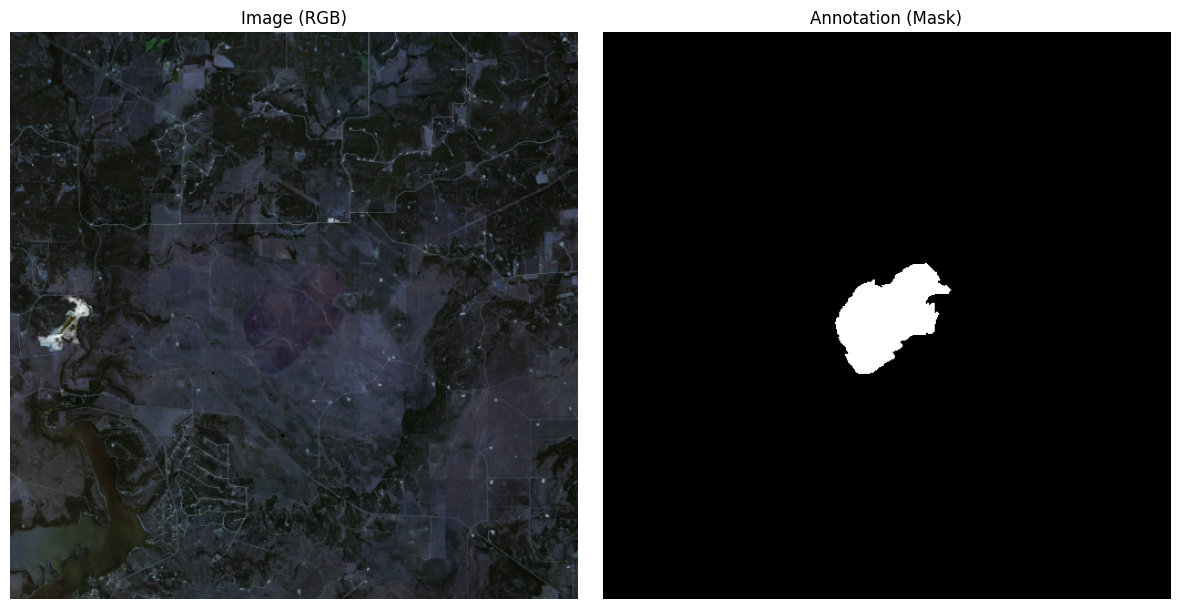

In [8]:
# Get a sample
sample = train_ds[0]

# Read the image and mask files with rasterio
with rasterio.open(sample["image"]) as src_img:
    image = src_img.read()
    profile = src_img.profile  # Keep profile for reference

with rasterio.open(sample["annotation"]) as src_mask:
    mask = src_mask.read(1)

# Prepare RGB image for visualization
image_rgb = image[:3].transpose(1, 2, 0)  # C,H,W to H,W,C

# Normalize each channel separately for display
for i in range(3):
    channel = image_rgb[:, :, i]
    min_val = np.min(channel)
    max_val = np.max(channel)
    if max_val > min_val:
        image_rgb[:, :, i] = (channel - min_val) / (max_val - min_val)

# Plot image and mask side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_rgb)
axs[0].set_title("Image (RGB)")
axs[0].axis("off")

axs[1].imshow(mask, cmap="gray", vmin=0, vmax=1)
axs[1].set_title("Annotation (Mask)")
axs[1].axis("off")

plt.tight_layout()
plt.show()

# Train a U-Net Model GeoCroissant using Hugging Face + PyTorch

In this notebook, we’ll train a U-Net model:

-  **GeoCroissant-style dataset** via Hugging Face `datasets`  
-  **Rasterio** for reading GeoTIFFs  
-  **PyTorch** for model building and training  

#  1. Load Dataset with Hugging Face datasets
- We use a custom dataset script `hls.py` that defines the burn scar dataset structure.

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
import rasterio
import numpy as np
from tqdm import tqdm


# 1. Load the dataset
dataset = load_dataset(
    "./hls.py",
    name="hls_burn_scars",
    trust_remote_code=True,
)

train_ds = dataset["train"]

# 2. Build a PyTorch Dataset
- We define a `BurnScarsDataset` class to load and preprocess `.tif` satellite images and burn scar masks using `rasterio`.

In [19]:
# 2. Data pipeline
class BurnScarsDataset(Dataset):
    def __init__(self, hf_dataset):
        self.dataset = hf_dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        with rasterio.open(sample["image"]) as img_file:
            image = img_file.read([1, 2, 3])
        image = image.astype("float32") / 255.0
        image = torch.from_numpy(image).float()  # (C, H, W)
        with rasterio.open(sample["annotation"]) as mask_file:
            mask = mask_file.read(1)
        mask = torch.from_numpy(mask).long()     # (H, W)
        mask = (mask > 0).long()                 # Ensure binary
        return image, mask

batch_size = 8
full_dataset = BurnScarsDataset(train_ds)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

# 3. Define the U-Net Segmentation Model
- We use a classic U-Net architecture with encoder-decoder blocks and skip connections for semantic segmentation.

In [20]:
# 4. U-Net Model 
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels=3, n_classes=1):
        super().__init__()
        self.inc = DoubleConv(n_channels, 64)
        self.down1 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(64, 128))
        self.down2 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(128, 256))
        self.down3 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(256, 512))
        self.down4 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(512, 1024))
        self.up1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.conv1 = DoubleConv(1024, 512)
        self.up2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.conv2 = DoubleConv(512, 256)
        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv3 = DoubleConv(256, 128)
        self.up4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv4 = DoubleConv(128, 64)
        self.outc = nn.Conv2d(64, n_classes, kernel_size=1)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5)
        x = self.conv1(torch.cat([x, x4], dim=1))
        x = self.up2(x)
        x = self.conv2(torch.cat([x, x3], dim=1))
        x = self.up3(x)
        x = self.conv3(torch.cat([x, x2], dim=1))
        x = self.up4(x)
        x = self.conv4(torch.cat([x, x1], dim=1))
        logits = self.outc(x)
        return logits

In [21]:
# 5. Setup device, model, optimizer, loss
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = UNet(n_channels=3, n_classes=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

Using device: cuda


# 5. Train the U-Net Model

In [22]:
# 6. Training 
epochs = 5
for epoch in range(1, epochs+1):
    model.train()
    total_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch {epoch} [Train]", leave=False)
    for images, masks in loop:
        images = images.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True).float()
        outputs = model(images)
        outputs = outputs.squeeze(1)  # (B, H, W)
        loss = criterion(outputs, masks)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())
    print(f"Epoch {epoch} Train Loss: {total_loss/len(train_loader):.4f}")

Epoch 1 Train Loss: 0.3494


Epoch 2 Train Loss: 0.2761


Epoch 3 Train Loss: 0.2591


Epoch 4 Train Loss: 0.2272


Epoch 5 Train Loss: 0.2105


# 7. Testing the Model

In [30]:
# 7. Testing 
model.eval()
model = model.to(device)

total_val_loss = 0.0
num_examples = 0
true_positives = 0

with torch.no_grad():
    for images, masks in tqdm(train_loader, desc=f"Epoch {epoch} [Val]", leave=False):
        images = images.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)

        outputs = model(images)
        outputs = outputs.squeeze(1)

        preds = (torch.sigmoid(outputs) > 0.5).long()
        total_val_loss += criterion(outputs, masks.float()).item()
        true_positives += (preds == masks).sum().item()
        num_examples += masks.numel()

val_accuracy = true_positives / num_examples * 100
print(f"Epoch {epoch} Val Loss: {total_val_loss/len(train_loader):.4f} | Accuracy: {val_accuracy:.2f}%")

Epoch 5 Val Loss: 0.3564 | Accuracy: 87.56%
